In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df = pd.read_csv('../Datasets/SPY.csv', index_col='Date', parse_dates=['Date'])
# df = df['2017':'2019']
df = df['2017':]
print("Number of rows and columns:", df.shape)
df.shape

Number of rows and columns: (1276, 6)


(1276, 6)

In [133]:
"""
df = df.resample('W').mean()
df.shape
df.corr()['Close']

df = df[['Close', 'Low', 'Adj Close']]
df.shape
"""

"\ndf = df.resample('W').mean()\ndf.shape\ndf.corr()['Close']\n\ndf = df[['Close', 'Low', 'Adj Close']]\ndf.shape\n"

In [3]:
splitPoint = int(len(df) * 0.9)
training_set = df[:'2020'].iloc[:,1:2].values
test_set = df['2021':].iloc[:,1:2].values
# training_set = df['2012'].iloc[:,1:2].values
training_set.shape

(1007, 1)

In [138]:
"""
df["Close"][:'2018'].plot(figsize=(16,4),legend=True)
df["Close"]['2019':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2019)','Test set (2019)'])
plt.title('IBM stock price')
plt.show()
"""

'\ndf["Close"][:\'2018\'].plot(figsize=(16,4),legend=True)\ndf["Close"][\'2019\':].plot(figsize=(16,4),legend=True)\nplt.legend([\'Training set (Before 2019)\',\'Test set (2019)\'])\nplt.title(\'IBM stock price\')\nplt.show()\n'

In [4]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
validation = 0.05
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = validation)

Epoch 1/100
29/29 [==============================] - 20s 288ms/step - loss: 0.0380 - val_loss: 0.0416
Epoch 2/100
29/29 [==============================] - 5s 182ms/step - loss: 0.0086 - val_loss: 0.0057
Epoch 3/100
29/29 [==============================] - 8s 274ms/step - loss: 0.0069 - val_loss: 0.0074
Epoch 4/100
29/29 [==============================] - 5s 184ms/step - loss: 0.0056 - val_loss: 0.0038
Epoch 5/100
29/29 [==============================] - 8s 274ms/step - loss: 0.0061 - val_loss: 0.0103
Epoch 6/100
29/29 [==============================] - 8s 267ms/step - loss: 0.0050 - val_loss: 0.0142
Epoch 7/100
29/29 [==============================] - 6s 205ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 8/100
29/29 [==============================] - 7s 245ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 9/100
29/29 [==============================] - 8s 279ms/step - loss: 0.0039 - val_loss: 0.0077
Epoch 10/100
29/29 [==============================] - 7s 249ms/step - loss: 0.0046 - val_l

29/29 [==============================] - 7s 255ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 82/100
29/29 [==============================] - 7s 241ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 83/100
29/29 [==============================] - 8s 272ms/step - loss: 0.0014 - val_loss: 0.0072
Epoch 84/100
29/29 [==============================] - 8s 266ms/step - loss: 0.0015 - val_loss: 0.0049
Epoch 85/100
29/29 [==============================] - 8s 270ms/step - loss: 0.0017 - val_loss: 0.0043
Epoch 86/100
29/29 [==============================] - 9s 301ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 87/100
29/29 [==============================] - 9s 305ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 88/100
29/29 [==============================] - 8s 271ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 89/100
29/29 [==============================] - 8s 278ms/step - loss: 0.0015 - val_loss: 0.0046
Epoch 90/100
29/29 [==============================] - 6s 212ms/step - loss: 0.0013 - val_loss: 

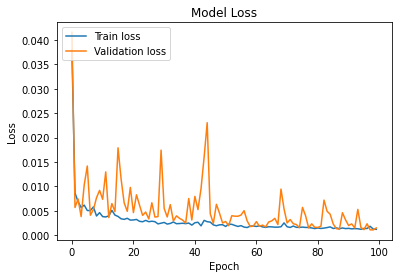

In [6]:
# Loss History
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper left')
plt.show()

In [7]:
# Now to get the test set ready in a similar way as the training set.
dataset_total = pd.concat((df["Close"][:'2020'],df["Close"]['2021':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,len(test_set)+60):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [8]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

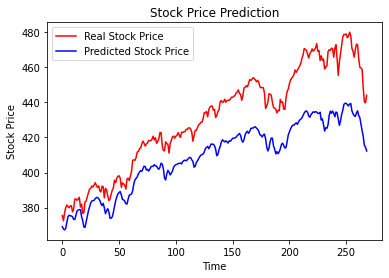

In [9]:
# Visualising the results
plt.plot(test_set, color='red',label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [10]:
rmse = math.sqrt(mean_squared_error(test_set, predicted_stock_price))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 23.633946384846123.


In [11]:
# NEXT STEPS:
# 1. FORECAST THE FUTURE AND COMPUTE THE ERROR
# 2. FIND OUT WHETHER ONLY 'CLOSE' FEATURE GETS TAKEN OR ALL OF THEM

In [11]:
from datetime import date, timedelta, datetime

today = date.today()

# List of considered Features
FEATURES = ['High', 'Low', 'Open', 'Close', 'Volume']

# Get fresh data until today and create a new dataframe with only the price data
date_start = pd.Timestamp('today') - timedelta(days=200)
new_df = pd.read_csv('../Datasets/SPY.csv', index_col='Date', parse_dates=['Date'])
d = pd.to_datetime(new_df.index)
new_df['Month'] = d.strftime("%m") 
new_df['Year'] = d.strftime("%Y") 
new_df = new_df.filter(FEATURES)

# Get the last 100 day closing price values and scale the data to be values between 0 and 1
last_100_days = new_df[-100:].values
last_100_days_scaled = sc.fit_transform(training_set)

In [12]:
# Create an empty list and Append past 100 days
X_test_new = []
X_test_new.append(last_100_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = sc.inverse_transform(pred_price_scaled)

# Print last price and predicted price for the next day
price_today = round(new_df['Close'][-1], 2)
predicted_price = round(pred_price_unscaled.ravel()[0], 2)
percent = round(100 - (predicted_price * 100)/price_today, 2)

a = '+'
if percent > 0:
    a = '-'

print('The close price for ' + 'SP500' + ' at ' + str(today) + ' was: ' + str(price_today))
print('The predicted close price is: ' + str(pred_price_unscaled) + ' (' + a + str(percent) + '%)')


The close price for SP500 at 2022-02-01 was: 433.38
The predicted close price is: [[370.07404]] (-14.61%)
